<center>
    <br />
    <h1>MAFS6010U Tutorial: Predict Up/Down of Stock Price</h1>
    <br /><br />
    Weizhi Zhu (wzhuai@connect.ust.hk)
</center>

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Fetch data from Yahoo Finance / Alpha Vantage

`Ticker()` Module allows you get market data for a chosen security. 

In [6]:
aapl = yf.Ticker("AAPL")

## stock info
for k,v in aapl.info.items():
    pass
    #print( "{}:{}".format(k,v)) 
"""
Returns
{
zip:95014
sector:Technology
fullTimeEmployees:137000
longBusinessSummary:Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, iPod touch, and other Apple-branded and third-party accessories. It also provides digital content stores and streaming services; AppleCare support services; and iCloud, a cloud service, which stores music, photos, contacts, calendars, mail, documents, and others. In addition, the company offers various service, such as Apple Arcade, a game subscription service; Apple Card, a co-branded credit card; Apple News+, a subscription news and magazine service; and Apple Pay, a cashless payment service, as well as licenses its intellectual property, and provides other related services. The company serves consumers, and small and mid-sized businesses; and the education, enterprise, and government markets. It sells and delivers third-party applications for its products through the App Store, Mac App Store, and Watch App Store. The company also sells its products through its retail and online stores, and direct sales force; and third-party cellular network carriers, wholesalers, retailers, and resellers. Apple Inc. was founded in 1977 and is headquartered in Cupertino, California.
city:Cupertino
phone:408-996-1010
state:CA
country:United States
...
}
"""

## stock OHLC chart
print( aapl.history( start="2020-03-01", end="2020-09-01", auto_adjust=True ).head(5) )
## - Adjusted closing price amends a stock's closing price to accurately reflect that stock's value after 
## accounting for any corporate actions.
## - The closing price is the 'raw' price which is just the cash value of the last transacted price before the 
## market closes.

## Pandas DataFrame is two-dimensional size-mutable, potentially heterogeneous tabular data structure with
## labeled axes (rows and columns). 
## A Data frame is a two-dimensional data structure, i.e., data is aligned in a tabular fashion in rows and columns.


## option chain for a specific expiration
opt = aapl.option_chain( "2020-04-24" )

              Open    High     Low   Close    Volume  Dividends  Stock Splits
Date                                                                         
2020-03-02  282.28  301.44  277.72  298.81  85349300          0             0
2020-03-03  303.67  304.00  285.80  289.32  79868900          0             0
2020-03-04  296.44  303.40  293.13  302.74  54794600          0             0
2020-03-05  295.52  299.55  291.41  292.92  46893200          0             0
2020-03-06  282.00  290.82  281.23  289.03  56544200          0             0


In [7]:
opt

Options(calls=         contractSymbol       lastTradeDate  strike  lastPrice     bid  \
0   AAPL200424C00130000 2020-03-25 16:51:23   130.0     125.43  122.80   
1   AAPL200424C00140000 2020-03-17 19:54:45   140.0     114.80  114.10   
2   AAPL200424C00150000 2020-03-16 14:20:54   150.0     102.85  104.35   
3   AAPL200424C00160000 2020-03-27 14:36:41   160.0      90.90   93.30   
4   AAPL200424C00170000 2020-03-23 15:40:24   170.0      50.50   83.65   
..                  ...                 ...     ...        ...     ...   
62  AAPL200424C00360000 2020-03-30 14:14:59   360.0       0.08    0.00   
63  AAPL200424C00365000 2020-03-27 17:41:34   365.0       0.09    0.00   
64  AAPL200424C00370000 2020-03-20 17:25:20   370.0       0.10    0.00   
65  AAPL200424C00375000 2020-03-26 15:40:39   375.0       0.06    0.00   
66  AAPL200424C00380000 2020-03-30 18:11:11   380.0       0.03    0.00   

       ask  change  percentChange  volume  openInterest  impliedVolatility  \
0   127.40    0.00 

As an alternative, one could also try Alpha Vantage, which allows you to fetch intra-day data at a given frequency.

In [7]:
from alpha_vantage.timeseries import TimeSeries
ALPHA_VANTAGE_API_KEY = 'DUG49BCC6WQE0F87'
# Initialize the TimeSeries class with key and output format
ts = TimeSeries(key=ALPHA_VANTAGE_API_KEY, output_format='pandas')
# Get pandas dataframe with the intraday data and information of the data
intraday_data, data_info = ts.get_intraday(
 'GOOGL', outputsize='full', interval='15min')
# Print the information of the data
intraday_data.head(10)

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2020-03-30 10:00:00,1101.4400,1107.2300,1099.7300,1104.350,130567.0
2020-03-30 09:45:00,1132.6400,1133.5232,1100.1801,1102.370,354096.0
2020-03-27 16:00:00,1126.8100,1128.5300,1105.3700,1110.340,360422.0
2020-03-27 15:45:00,1147.8600,1148.9800,1124.1899,1126.780,104667.0
2020-03-27 15:30:00,1139.7200,1151.0000,1138.8000,1147.775,80771.0
2020-03-27 15:15:00,1136.8700,1143.4100,1134.8600,1138.800,88927.0
2020-03-27 15:00:00,1128.9700,1137.6200,1128.4700,1136.400,50037.0
2020-03-27 14:45:00,1129.0850,1133.4900,1128.6000,1129.755,40990.0
2020-03-27 14:30:00,1124.3629,1131.7400,1124.3629,1129.850,56389.0


## Pair Trading

*** A pairs trade or pair trading is a market neutral trading strategy enabling traders to profit from virtually any market conditions: uptrend, downtrend, or sideways movement. This strategy is categorized as a statistical arbitrage and convergence trading strategy. Pair trading was pioneered by Gerry Bamberger and later led by Nunzio Tartaglia's quantitative group at Morgan Stanley in the 1980s. ***

***Pepsi (PEP) and Coca-Cola (KO) are different companies that create a similar product, soda pop. Historically, the two companies have shared similar dips and highs, depending on the soda pop market. If the price of Coca-Cola were to go up a significant amount while Pepsi stayed the same, a pairs trader would buy Pepsi stock and sell Coca-Cola stock, assuming that the two companies would later return to their historical balance point. If the price of Pepsi rose to close that gap in price, the trader would make money on the Pepsi stock, while if the price of Coca-Cola fell, he would make money on having shorted the Coca-Cola stock.***

## Set Up Trading Securities and Fetch Data from Yahoo Finance

In [3]:
START = "2018-04-01"; END = "2020-03-29"
T1 = "MS"; T2 = "GS"
# T1 = "PEP"; T2 = "KO"

# we buy the loser when the predicted close price is larger than open price

# noted price has already been adjusted (for dividend and split).
tickers = yf.Tickers( " ".join([T1, T2]) )
OHLC = tickers.history( start=START, end=END )[["Open", "Close", "High", "Low", "Volume"]]

[*********************100%***********************]  2 of 2 completed


/Users/zwz/anaconda/lib/python3.5/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


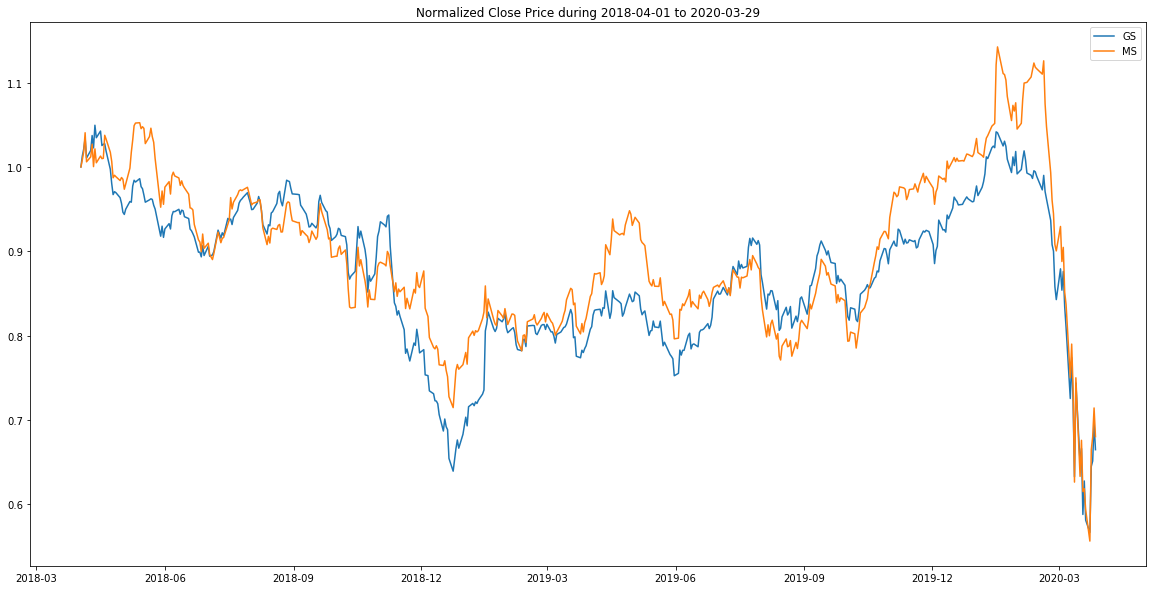

In [4]:
fig, ax = plt.subplots( figsize=(20, 10) )
for col in OHLC["Close"]:
    ax.plot( OHLC["Close"][col]/OHLC["Close"][col][0], label=col )
ax.legend()
ax.set_title( "Normalized Close Price during %s to %s" % (START, END) )
plt.show()

# "Make" Some Features

In [5]:
pd_data = pd.DataFrame(index = OHLC.index)
pd_data[T1 + "_ret7"] = 100 * (OHLC[("Close", T1)]/OHLC[("Close", T1)].shift(7) - 1)
pd_data[T2 + "_ret7"] = 100 * (OHLC[("Close", T2)]/OHLC[("Close", T2)].shift(7) - 1)
pd_data[T1 + "_return"] = 100 * (OHLC[("Close", T1)]/OHLC[("Open", T1)] - 1)
pd_data[T2 + "_return"] = 100 * (OHLC[("Close", T2)]/OHLC[("Open", T2)] - 1)

# find the loser
pd_data["Min"] = pd_data.min(axis=1)
pd_data["Is"+T1] = pd_data["Min"].isin( pd_data[T1+"_ret7"] )

# More features
def ATR(df_ohlc, ticker, window):
    '''Average True Range, which indicates the vol of market'''
    atr = [ 0 ]
    for t in range(1, len(df_ohlc)):
        atr.append( max( df_ohlc[("High", ticker)].iloc[t-1] - df_ohlc[("Low",ticker)].iloc[t-1],
                         abs(df_ohlc[("High", ticker)].iloc[t-1] - df_ohlc[("Open",ticker)].iloc[t]),
                         abs(df_ohlc[("Low", ticker)].iloc[t-1] - df_ohlc[("Open",ticker)].iloc[t]) ) )
    return pd.Series( atr, index=df_ohlc.index ).rolling(window=window).mean() 

## rolling mean/std
for ticker in [T1, T2]:
    pd_data["%s_open" % ticker ] = OHLC[("Open", ticker)]
    pd_data["%s_close" % ticker ] = OHLC[("Close", ticker)]
    pd_data["%s_vol" % ticker] = OHLC[("Volume", ticker)]/1e6
    pd_data["%s_atr7" % ticker ] = ATR(OHLC, ticker, 40)
    pd_data["%s_mean7" % ticker ] = OHLC[("Close", ticker)].rolling(7).mean()
    pd_data["%s_mean3" % ticker ] = OHLC[("Close", ticker)].rolling(3).mean()
    pd_data["%s_mean15" % ticker ] = OHLC[("Close", ticker)].rolling(15).mean()
    pd_data["%s_std7" % ticker ] = OHLC[("Close", ticker)].rolling(7).std()
    pd_data["%s_vol3" % ticker ] = OHLC[("Volume", ticker)].rolling(3).mean()/1e6
    pd_data["%s_vol7" % ticker ] = OHLC[("Volume", ticker)].rolling(7).mean()/1e6

pd_data.dropna(inplace=True)
pd_data.head(5)



,MS_ret7,GS_ret7,MS_return,GS_return,Min,IsMS,MS_open,MS_close,MS_vol,MS_atr7,...,GS_open,GS_close,GS_vol,GS_atr7,GS_mean7,GS_mean3,GS_mean15,GS_std7,GS_vol3,GS_vol7
Date,,,,,,,,,,,,,,,,,,,,,
2018-05-25,-3.565579,-2.469286,-1.211333,0.004253,-3.565579,True,51.149023,50.529438,10.1528,1.152747,...,226.378006,226.387634,1.9856,4.951659,228.541312,227.636729,230.516374,1.298594,2.469433,2.439029
2018-05-29,-8.948431,-5.048100,-4.254506,-1.939360,-8.948431,True,49.738276,47.622158,26.6051,1.192067,...,223.025679,218.700409,5.3236,5.062440,226.880288,224.175232,229.863250,3.751838,3.205967,2.847729
2018-05-30,-5.471063,-2.966087,0.532545,0.096096,-5.471063,True,48.327534,48.584900,11.5426,1.209700,...,221.320204,221.532883,3.3486,5.029206,225.912901,222.206975,229.411802,4.172788,3.552600,2.940529
2018-05-31,-7.763056,-4.636620,-1.104539,-0.642206,-7.763056,True,48.327536,47.793739,15.1504,1.203660,...,219.773459,218.362061,5.3349,4.986386,224.396203,219.531784,228.445202,4.760688,4.669033,3.423843
2018-06-01,-6.687330,-3.715307,0.549772,-0.021886,-6.687330,True,48.546767,48.813663,10.0039,1.178639,...,220.798202,220.749878,3.3309,4.849963,223.179345,220.214940,227.527971,4.381441,4.004800,3.535186


## Simple Trading Strategy

**scikit-learn**

Scikit-learn (formerly scikits.learn and also known as sklearn) is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy.

** backtesting **

In a trading strategy, investment strategy, or risk modeling, backtesting seeks to estimate the performance of a strategy or model if it had been employed during a past period. This requires simulating past conditions with sufficient detail, making one limitation of backtesting the need for detailed historical data. A second limitation is the inability to model strategies that would affect historic prices. Finally, backtesting, like other modeling, is limited by potential overfitting. That is, it is often possible to find a strategy that would have worked well in the past, but will not work well in the future. Despite these limitations, backtesting provides information not available when models and strategies are tested on synthetic data.

`Classification`

In [6]:
training = 38
testing = 1

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import tree

logit_clf = LogisticRegression( C=.1, solver="liblinear" )
tree_clf = tree.DecisionTreeClassifier( max_depth=10 )
svm_clf = SVC( C=.1 )

model_ret = {}
for clf_name, clf in [ ("logit_clf", logit_clf), 
                       ("tree_clf", tree_clf),
                       ("svm_clf", svm_clf) ]:
    model_ret[clf_name] = []
    for ii in range(training, len(pd_data)-testing, testing):
        ## training ii-training to ii-1, testing ii - ii+testing-1

        ## training models
        model = {}
        for ticker in [T1, T2]:
            feat_col = [ ticker + n for n in [ "_open", "_atr7", "_mean3", "_mean7", "_mean15", "_std7" ] ]
            feat_col += ["Is"+T1]
            XX = pd_data[feat_col].iloc[ii-training:ii]
            yy = pd_data[ticker+"_close"].iloc[ii-training:ii] < pd_data[ticker+"_open"].iloc[ii-training:ii]
            model[ticker] = clf
            model[ticker].fit( XX, yy ) #Calling fit on any scikit-learn estimator will forget all the previously seen data.

        # testing models
        for jj in range(ii, ii+testing):
            ticker = T1 if pd_data["Is"+T1].iloc[jj] else T2
            feat_col = [ ticker + n for n in [ "_open", "_atr7", "_mean3", "_mean7", "_mean15", "_std7" ] ]
            feat_col += ["Is"+T1]
            xx = pd_data[feat_col].iloc[[jj]]
            yy_pred = model[ticker].predict( xx )
            ret = np.nan if yy_pred else pd_data[ticker + "_return" ].iloc[jj]
            model_ret[clf_name].append( ret )
    last_testing = jj

`Regression`

In [7]:
training = 38
testing = 1

from sklearn.linear_model import LinearRegression, Ridge
from sklearn import tree

linear_reg = LinearRegression( )
ridge_reg = Ridge( alpha=.5 )
tree_reg = tree.DecisionTreeRegressor( max_depth=10 )

for reg_name, reg in [ ("linear_reg", linear_reg), 
                       ("ridge_reg", ridge_reg),
                       ("tree_reg", tree_reg) ]:
    model_ret[reg_name] = []
    for ii in range(training, len(pd_data)-testing, testing):
        ## training ii-training to ii-1, testing ii - ii+testing-1

        ## training models
        model = {}
        for ticker in [T1, T2]:
            feat_col = [ ticker + n for n in [ "_open", "_atr7", "_mean3", "_mean7", "_mean15", "_std7" ] ]
            feat_col += ["Is"+T1]
            XX = pd_data[feat_col].iloc[ii-training:ii]
            yy = pd_data[ticker+"_close"].iloc[ii-training:ii]
            model[ticker] = reg
            model[ticker].fit( XX, yy ) #Calling fit on any scikit-learn estimator will forget all the previously seen data.

        # testing models
        for jj in range(ii, ii+testing):
            ticker = T1 if pd_data["Is"+T1].iloc[jj] else T2
            feat_col = [ ticker + n for n in [ "_open", "_atr7", "_mean3", "_mean7", "_mean15", "_std7" ] ]
            feat_col += ["Is"+T1]
            xx = pd_data[feat_col].iloc[[jj]]
            yy_pred = model[ticker].predict( xx )
            ret = np.nan if yy_pred < pd_data[ticker+"_open"].iloc[jj] else\
                 pd_data[ticker + "_return" ].iloc[jj]
            model_ret[reg_name].append( ret )
    last_testing = jj

In [8]:
training = 38
testing = 1

model_ret["Baseline"] = []
for ii in range(training, len(pd_data)-testing, testing):
    # testing models
    for jj in range(ii, ii+testing):
        ticker = T1 if pd_data["Is"+T1].iloc[jj] else T2
        ret = pd_data[ticker + "_return" ].iloc[jj]
        model_ret["Baseline"].append( ret )
last_testing = jj

## Comparison With Baseline

In [9]:
T1Baseline = pd_data[T1 + "_return"].iloc[training:last_testing+1]
T2Baseline = pd_data[T2 + "_return"].iloc[training:last_testing+1]
for name in ["logit_clf", "tree_clf", "svm_clf", "linear_reg", "ridge_reg", "tree_reg"]:
    model_ret[name] = pd.Series( model_ret[name], index=T1Baseline.index )


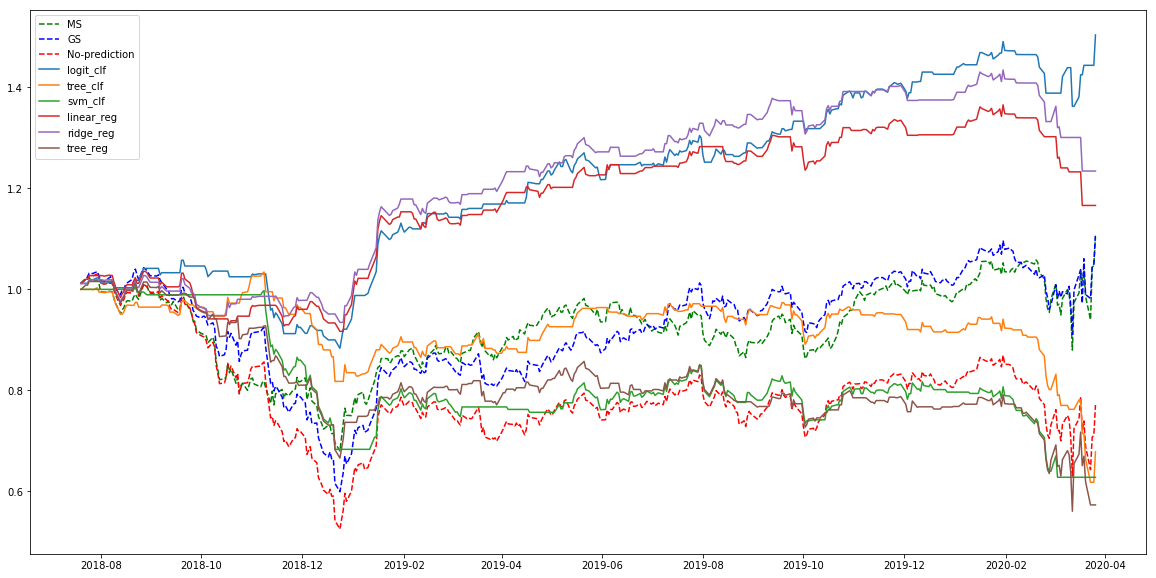

In [10]:
tc = -0.0005 # 0.5% transcation cost
fig, ax = plt.subplots( figsize=(20, 10) )
ax.plot( 1 + T1Baseline.cumsum()/100, "g--", label="%s"%T1 )
ax.plot( 1 + T2Baseline.cumsum()/100, "b--", label="%s"%T2 )
ax.plot( 1 + pd.Series(model_ret["Baseline"], index=T1Baseline.index).cumsum()/100 , "r--", label="No-prediction" )

for name in ["logit_clf", "tree_clf", "svm_clf", "linear_reg", "ridge_reg", "tree_reg"]:
    ax.plot( 1 + model_ret[name].fillna(0).cumsum()/100, label=name )
ax.legend()
plt.show()